In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

In [2]:
replace_list = [-1]
cereal_data_no_index = pd.read_csv("cereals.csv", header=0, na_values=replace_list)

In [3]:
cereal_data_no_index['multiplier'] = 1 / cereal_data_no_index['cups']

cereal_data_no_index.loc[(cereal_data_no_index["potass"].isnull()), "potass"] = cereal_data_no_index.potass.median()
cereal_data_no_index.loc[(cereal_data_no_index["carbo"].isnull()), "carbo"] = cereal_data_no_index.carbo.median()
cereal_data_no_index.loc[(cereal_data_no_index["sugars"].isnull()), "sugars"] = cereal_data_no_index.sugars.median()

In [4]:
for column in cereal_data_no_index.ix[:, 3:12].columns:
    cereal_data_no_index[column + '_weighted'] = cereal_data_no_index[column] * cereal_data_no_index['multiplier']

In [5]:
cereal_data_no_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 25 columns):
name                 77 non-null object
mfr                  77 non-null object
type                 77 non-null object
calories             77 non-null int64
protein              77 non-null int64
fat                  77 non-null int64
sodium               77 non-null int64
fiber                77 non-null float64
carbo                77 non-null float64
sugars               77 non-null float64
potass               77 non-null float64
vitamins             77 non-null int64
shelf                77 non-null int64
weight               77 non-null float64
cups                 77 non-null float64
multiplier           77 non-null float64
calories_weighted    77 non-null float64
protein_weighted     77 non-null float64
fat_weighted         77 non-null float64
sodium_weighted      77 non-null float64
fiber_weighted       77 non-null float64
carbo_weighted       77 non-null float64
sugars_wei

In [6]:
cereal_data_copy = cereal_data_no_index.copy()
cereal_data_copy.drop(['name'], 1, inplace=True)
cereal_data_copy = pd.get_dummies(cereal_data_copy, columns=['mfr','type'])

In [7]:
pca = PCA(n_components=2)
pca.fit(cereal_data_copy)
reduced_X = pca.transform(cereal_data_copy)

In [8]:
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(cereal_data_copy.ix[:, 16:25])

[[  2.67547952e+02   2.94141483e+00   2.06837327e+01   9.99750292e+00
    1.43519264e+02   4.33564196e+01  -1.73472348e-18   3.86363636e-01
    2.95454545e-01]
 [  5.35454545e+02   2.43939394e+01   3.00909091e+01   1.13333333e+01
    7.09545455e+02   7.53787879e+01   0.00000000e+00   0.00000000e+00
    5.00000000e-01]
 [  8.64562857e+01   1.72310470e+00   1.58881328e+01   8.11019692e+00
    8.68597718e+01   2.20758106e+01   3.44827586e-02   1.72413793e-01
    2.75862069e-01]]


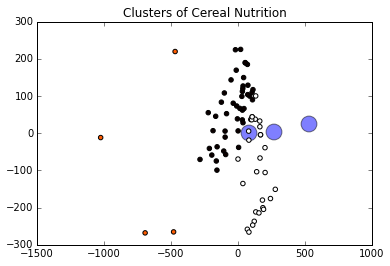

In [9]:
print(kmeans.cluster_centers_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=.5, s=250)
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y_pred, cmap="hot")
plt.title("Clusters of Cereal Nutrition")
plt.show()

In [10]:
#There seems to be three areas of clusters but one of them is very spread out and looks out of place.  
#The cluster centers seem out of place too.